In [10]:
import pandas as pd # import necessory library
import numpy as np

In [11]:
df = pd.read_csv('faketrain.csv')
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [12]:
df.isnull().sum() # to identify null values in datafeame

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [13]:
df = df.dropna() # remove the null value

In [14]:
X = df.drop('label', axis=1) # X,y splitting
y = df['label']

In [15]:
# important libraries for lstm
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Embedding,LSTM,Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
#Since we drop Null values from our Dataset ,so we need to Reset Index of our Dataset
mess = X.copy()
mess.reset_index(inplace=True)

In [17]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [18]:
import nltk #Natural Language Toolkit, library for working with human language data (text).
import re #this imports the regular expressions (re) module, which is used for string searching and manipulation.
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
ps = PorterStemmer()
corpus = []
for i in range(0,len(mess)):
    result = re.sub('[^a-zA-Z]',' ',mess['title'][i]) 
    result = result.lower()
    result = result.split()
    
    result = [ps.stem(word) for word in result if not word in stopwords.words("english")]
    result = " ".join(result)
    corpus.append(result)


In [21]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [22]:
voc_size = 5000
onehot = [one_hot(words,voc_size) for words in corpus]
onehot

[[2540, 814, 591, 3832, 3370, 4541, 3413, 3582, 3302, 1094],
 [300, 429, 2465, 3561, 290, 173, 4127],
 [2036, 3363, 3018, 1549],
 [648, 1848, 4411, 1313, 3019, 2798],
 [992, 290, 1905, 3727, 401, 1657, 290, 1533, 1800, 18],
 [3671,
  3609,
  2669,
  79,
  68,
  76,
  4622,
  2920,
  1517,
  1458,
  2763,
  2593,
  1698,
  3751,
  4127],
 [2720, 3084, 1979, 3943, 1234, 3371, 4970, 3481, 1040, 3778, 518],
 [1085, 2416, 2002, 1336, 2997, 1797, 76, 4109, 1040, 3778, 518],
 [3820, 3817, 3380, 2519, 2403, 102, 2965, 1366, 76, 4811],
 [3564, 1014, 1102, 2647, 815, 1492, 2718, 3385],
 [2875, 537, 4716, 29, 2971, 3571, 2549, 2844, 4520, 762, 3811],
 [1313, 2672, 3370, 102, 76, 2997],
 [678, 3831, 3747, 3384, 3462, 33, 1304, 3407, 3078],
 [279, 850, 428, 327, 889, 3969, 2487, 1040, 3778, 518],
 [1673, 4200, 4803, 876, 513, 1040, 3778, 518],
 [2491, 505, 3497, 2763, 4165, 4115, 2244, 3487, 380, 123],
 [1295, 547, 429],
 [3638, 3108, 2077, 1749, 76, 1759, 1827, 4127],
 [135, 3790, 2465, 2510, 815,

In [23]:
length = 20
embeded_docs = pad_sequences(onehot,padding= 'pre',maxlen = length)
embeded_docs


array([[   0,    0,    0, ..., 3582, 3302, 1094],
       [   0,    0,    0, ...,  290,  173, 4127],
       [   0,    0,    0, ..., 3363, 3018, 1549],
       ...,
       [   0,    0,    0, ..., 1040, 3778,  518],
       [   0,    0,    0, ...,  619, 3156, 2070],
       [   0,    0,    0, ...,   88, 1782, 1629]])

In [24]:
embeded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2540,
        814,  591, 3832, 3370, 4541, 3413, 3582, 3302, 1094])

In [25]:
embeded_docs.dtype

dtype('int32')

In [26]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

C:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
X_final = np.array(embeded_docs)
y_final = np.array(y)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.3,random_state=42)

In [29]:
history = model.fit(X_train,y_train,validation_data =(X_test,y_test),batch_size=64,epochs=10)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7796 - loss: 0.4464 - val_accuracy: 0.9116 - val_loss: 0.1994
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9368 - loss: 0.1553 - val_accuracy: 0.9196 - val_loss: 0.1905
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9569 - loss: 0.1222 - val_accuracy: 0.9163 - val_loss: 0.2200
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9663 - loss: 0.0914 - val_accuracy: 0.9112 - val_loss: 0.2230
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9766 - loss: 0.0732 - val_accuracy: 0.9156 - val_loss: 0.2629
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9798 - loss: 0.0577 - val_accuracy: 0.9070 - val_loss: 0.2885
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.9863 - loss: 0.0434 - val_accuracy: 0.9070 - val_loss: 0.3210
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9881 - loss: 0.0343 - val_acc

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 20, 40)              │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 40)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          56,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769,505 (2.94 MB)

 Trainable params: 256,501 (1001.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 513,004 (1.96 MB)

In [31]:
y_final

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [32]:
y_pred = model.predict(X_final)
y_pred

572/572 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


array([[9.9927700e-01],
       [3.1456360e-04],
       [9.9612969e-01],
       ...,
       [4.2680178e-05],
       [4.1474716e-04],
       [9.9922585e-01]], dtype=float32)

In [33]:
import matplotlib.pyplot as plt
def plot_learning_curve(history,epochs):
    #Accuracy
    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history["val_accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["Train","Val"],loc ="upper left")
    plt.show()

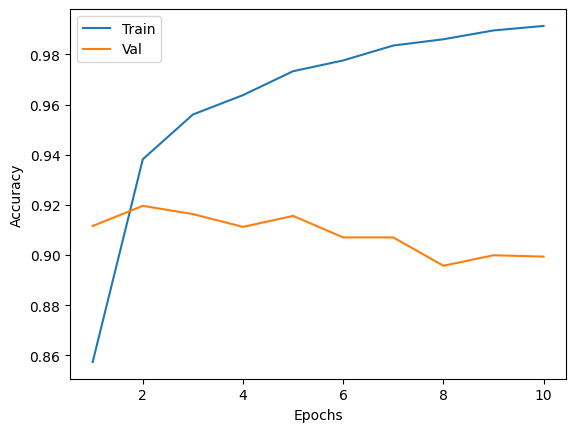

In [34]:
plot_learning_curve(history,10)

In [35]:
print(X_test.shape)
print(y_test.shape)

(5486, 20)
(5486,)


In [36]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # or use the appropriate method for binary classification

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [37]:
print(y_pred.shape)
print(y_test.shape)

(5486,)
(5486,)


In [38]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.566350710900474
              precision    recall  f1-score   support

           0       0.57      1.00      0.72      3107
           1       0.00      0.00      0.00      2379

    accuracy                           0.57      5486
   macro avg       0.28      0.50      0.36      5486
weighted avg       0.32      0.57      0.41      5486



C:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [39]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

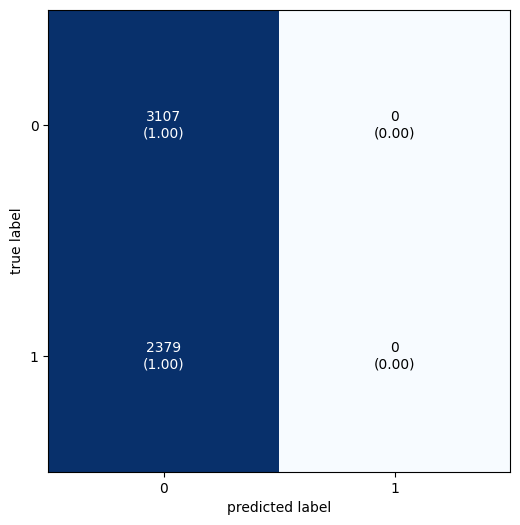

In [40]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(mat,figsize=(6,6),show_normed=True)